Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **37 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nahom Agize"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and Heapsort


## Question 1 [time estimate: 10 minutes]

Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

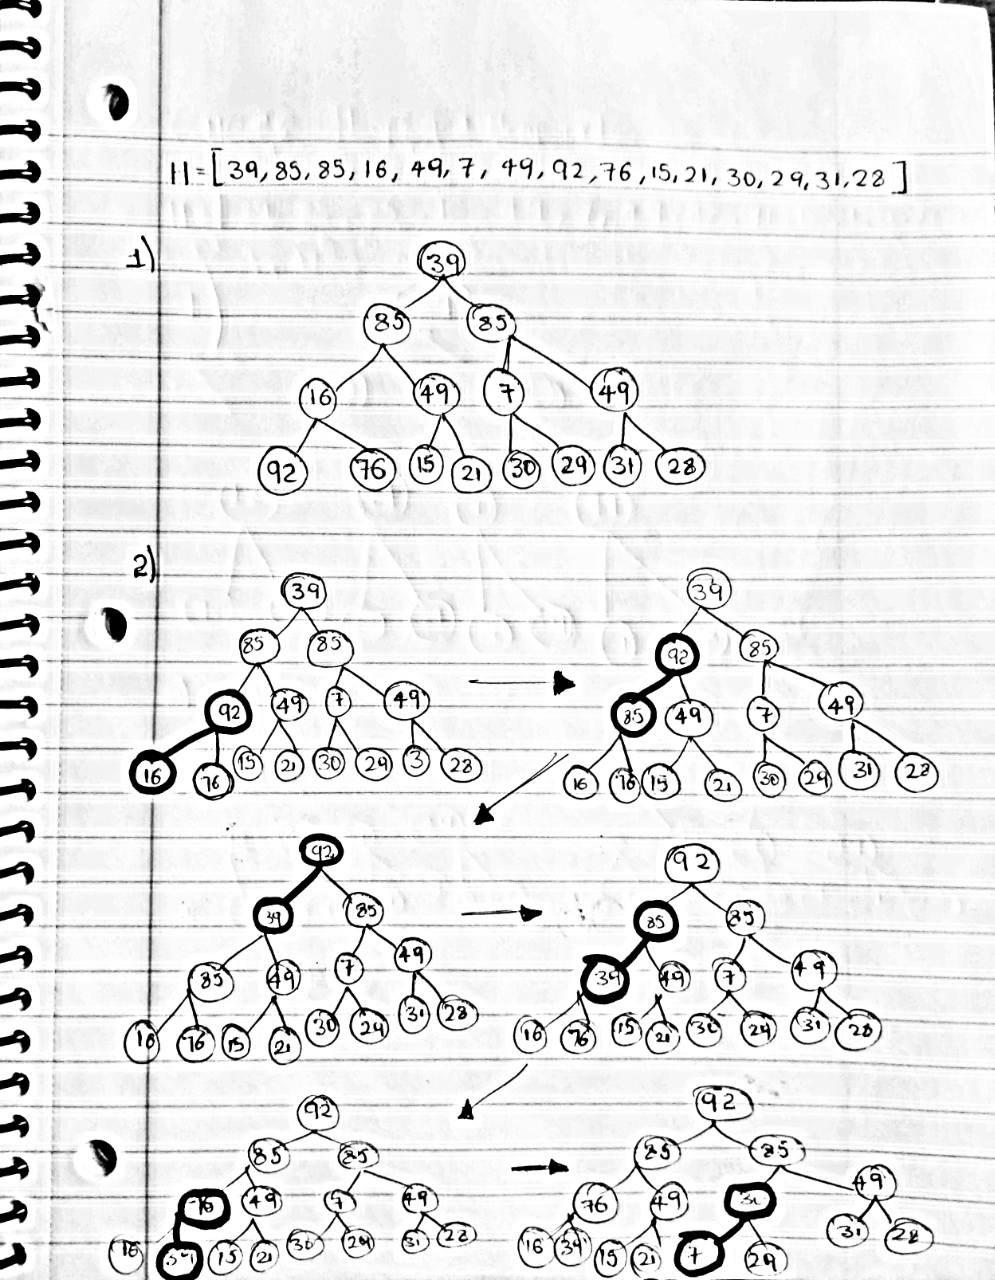

In [53]:
from IPython.display import Image
Image("Heap_heap.jpg") 

1- The first binary tree is not a max heap because we observe cases where the parent might have smaller values than the children. For example, we see an element 7 being a parent for elements 30 and 29. 

3 - H = [92, 85, 85, 76, 49, 30, 49, 16, 39, 15, 21, 7, 29, 31, 28]

## Question 2. 

Consider the following questions on the $MAX-HEAPIFY$ operation.

### Question 2a [time estimate: 5 minutes]

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


A.heap-size is basically the number of elements we have in our heap. In the case of the first example our heap-size is 15. A.heap-size always takes a value between 1 and A.length (inclusive). 

The local variable "largest" is a place where we store the largest value among the selected index, it's left child and it's right child. We can then use this stored element and exchange it with the selected index, if one of the children has larger value than the selected parent index.

### Question 2b [time estimate: 2 minutes]

The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [54]:
def left(i):
    return 2*i + 1
    raise NotImplementedError()

In [55]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [56]:
def right(i):
    return 2*i + 2
    raise NotImplementedError()

In [57]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c [time estimate: 10 minutes]

Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [58]:
def heapify(heap, i):
    """
    Parameters
    ----------
    heap : list of floats
        Assume that the heap size is the length of the heap
        
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    l = left(i)        #Assigning a variable to the left child of index i
    r = right(i)       #Assigning a variable to the right child of index i
    largest = 0         # initialize the variable "largest"
    if l < len(heap) and heap[l] > heap[i]:     #comparing if the left child is greater than the parent index
        largest = l                          #If so, assigning largest to left child
    else:
        largest = i                          #If not, largest will be the parent index
    
    if r < len(heap) and heap[r] > heap[largest]:       #Compare if right child is greater than either parent index or left child
        largest = r                                     #If so, assigning largest to right child
    if largest!=i:                                      
        heap[i], heap[largest] = heap[largest], heap[i]   #If largest different from parent index, swap with either left or right child(which ever is greater)
        heapify(heap, largest)                            # Use the function heapify recursively on our new largest number
    #raise NotImplementedError()

In [65]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3 [time estimate: 3 minutes] 

Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [74]:
def build_max_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid max heap, in-place.
    
    """
    for i in range((len(A))//2,-1,-1):      #Go through the entire array starting from the middle and decrementing by 1 to heapify all elements
        heapify(A,i)
    #raise NotImplementedError()

In [75]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

## Question 4 [time estimate: 7 minutes]

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [76]:
def min_heapify(heap, i):
    """
    Parameters
    ----------
    heap : a list of floats
        Assume that the heap size is the length of the heap.
    
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    l = left(i)        #Assigning a variable to the left child of index i
    r = right(i)       #Assigning a variable to the right child of index i
    smallest = 0       #initializing the variable "smallest"
    if l < len(heap) and heap[l] < heap[i]:           #comparing if the left child is less than the parent index  
        smallest = l                            #If so, assigning smallest to left child
    else:
        smallest = i                            #If not, smallest will be the parent index
        
    if r < len(heap) and heap[r] < heap[smallest]:    #Compare if right child is less than either parent index or left child
        smallest = r                                  #If so, assigning smallest to right child
    if small != i:
        heap[i],heap[smallest] = heap[smallest],heap[i]     #If smallest different from parent index, swap with either left or right child(which ever is smaller)
        min_heapify(heap,smallest)                           # Use the function heapify recursively on our new largest number
    #raise NotImplementedError()

In [77]:
def build_min_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid min heap, in-place.
    
    """
    for i in range((len(A))//2,-1,-1):
        min_heapify(A,i)
    #raise NotImplementedError()

In [64]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 